In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import joblib

# Set image size and dataset path
IMAGE_SIZE = (100, 100)
dataset_path = '../Datasets/Sugarcane_leafs/'
sugarcane_classes = ['BacterialBlights', 'Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']

# Load images and labels
X, y = [], []
for label in sugarcane_classes:
    folder = os.path.join(dataset_path, label)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(label)

In [2]:
X = np.array(X)
y = np.array(y)

# Flatten images for classical ML
X_flat = X.reshape(len(X), -1)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
# Predict and evaluate
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {acc * 100:.2f}%")

Random Forest Test Accuracy: 60.11%


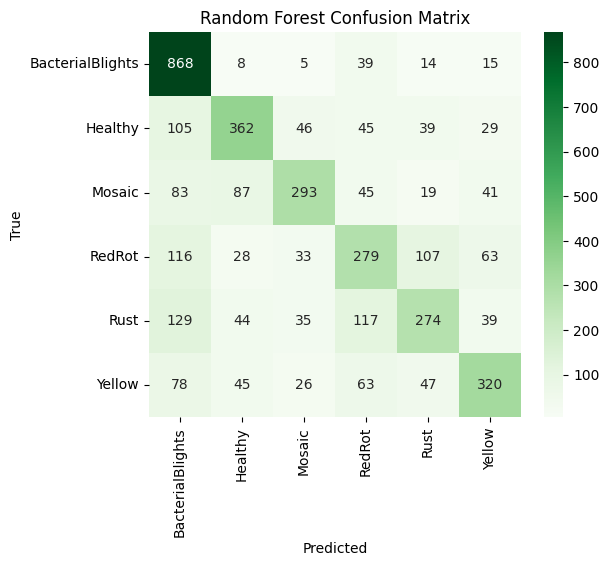

In [4]:
# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [5]:
# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Random Forest Classification Report:
                   precision    recall  f1-score   support

BacterialBlights       0.63      0.91      0.75       949
         Healthy       0.63      0.58      0.60       626
          Mosaic       0.67      0.52      0.58       568
          RedRot       0.47      0.45      0.46       626
            Rust       0.55      0.43      0.48       638
          Yellow       0.63      0.55      0.59       579

        accuracy                           0.60      3986
       macro avg       0.60      0.57      0.58      3986
    weighted avg       0.60      0.60      0.59      3986



In [6]:
# Save model and label encoder
joblib.dump(rf_clf, '../Models/sugarcane_rf_model.pkl')
joblib.dump(le, '../Models/sugarcane_label_encoder.pkl')

['../Models/sugarcane_label_encoder.pkl']